In [28]:
import matplotlib.pyplot as plt
import numpy as np
from math import log
from matplotlib import cm 
from random import randint
from typing import List
from plotly import graph_objects as go


## Optimisation

In machine learning, optimisation refers to the process of an algorithm improving previous results to improve the guess. The term `loss` is used to measure how far away the result is from the prediction. The distance between the two values is how we quantify if the algorithm is improving or declining. The most common `loss` functions are

#### Mean Squared Error (MSE)

$$
MSE = \frac{1}{n} = \sum_{i = 1}^{n} (Y_{i} - \hat{Y}_{i})^{2}
$$

In matrix notation,

$$
MSE = \frac{1}{n} \sum_{i=1}^{n}(e_{i})^{2} = \frac{1}{n}e^{T}e
$$

#### Residual Sum of Squares (RSS)/Sum of Squared Errors (SSE)

$$
RSS = \sum_{i = 1}^{n} (y_{i} - f(x_{i}))^{2}
$$

#### Root Mean Square Error (RMSE)

$$
\sqrt{\frac{\sum_{i = 1}^{N}(x_{i} - \hat{x}_{i})^{2}}{N}}
$$

Gradient descent is like a walk down a mountain, where if the next step increases in height, you take a step back and try to find a path that lets you get to the lowest point of the mountain.

In [ ]:
# The function we want to run Gradient Descent on
def paraboloid(x, y):
    return(x**2 + y**2)

#Test Data

# Test data generation (only really necessary for the plotting below)
xs_start = ys_start = -10
xs_stop = ys_stop = 11
xs_step = ys_step = 1

xs: List[float] = [i for i in range(xs_start, xs_stop, xs_step)]
ys: List[float] = [i for i in range(ys_start, ys_stop, ys_step)]
zs: List[List[float]] = []

for x in xs:
    temp_res: List[float] = []
    for y in ys:
        result: float = paraboloid(x, y)
        temp_res.append(result)
    zs.append(temp_res)

#print(f'xs: {xs}\n')
#print(f'ys: {ys}\n')
#print(f'zs: {zs[:5]} ...\n')

In [ ]:
# Plotting the generated test data
fig = go.Figure(
    go.Surface(
        x = xs, y = ys, z = zs, colorscale = 'Viridis'
        ))

fig.show()

## Gradients and Derivatives

> ...a vector-valued function $f...,$ whose value at a point $p$ is the vector whose components are the partial derivatives of $f$ at $p$.

In short, for any given value $p$ on the function, there is a vector of `partial derivatives`, which point in the direction of greatest increase.

- a derivative measures the rate of change of a function in respect to the changes in its input.
- the difference with partial derivatives is that you're deriving while keeping every other variable as a constant.

Using our parabloid example:

$$
\frac{\partial}{\partial x} (x^{2} + y^{2}) = 2x
$$

With those partial derivatives we're now able to compute any gradient for any point $p$ sitting on the plotted surface of function $f$. 

In [ ]:
# The Gradient is a vector pointing in the direction of greatest increase
# This function computes gradients for our Paraboloid function (defined above)
 
def compute_gradient(vec: List[float]) -> List[float]:
    assert len(vec) == 2
    x: float = vec[0]
    y: float = vec[1]
    # The derivative of z with respect to x is 2 * x
    # The derivative of z with respect to y is 2 * y
    return([2 * x, 2 * y])

Right now, the gradient vector is pointing upwards to the direction of greatest **increase**. We need to turn that vector into the opposite direction so that it points to the direction of greatest decrease.

We can do that if we multiply the gradient vector by `-1`.

The algorithm works as follows.

1. Get the starting position $p$ (which is represented as a vector) on $f$
2. Compute the gradient at point $p$
3. Multiply the gradient by a negative `step size` (usually a value smaller than `1`)
4. Compute the next position of $p$ on the surface by adding the rescaled gradient vector to the vector $p$
5. Repeat `step 2` with the new $p$ until convergence

In [ ]:
#learning_rate = step_size
# This function computes the next position based on the current position, its computed gradient and the learning rate

def compute_step(curr_pos: List[float], learning_rate: float) -> List[float]:
    grad: List[float] = compute_gradient(curr_pos)
    grad[0] *= -learning_rate
    grad[1] *= -learning_rate
    next_pos: List[float] = [0, 0]
    next_pos[0] = curr_pos[0] + grad[0]
    next_pos[1] = curr_pos[1] + grad[1]
    return(next_pos)

# define a random starting position p

start_pos: List[float]

# Ensure that we don't start at a minimum (0, 0 in our case)
while True:
    start_x: float = randint(xs_start, xs_stop)
    start_y: float = randint(ys_start, ys_stop)
    if start_x != 0 and start_y != 0:
        start_pos = [start_x, start_y]
        break

print(start_pos)

And finally we wrap our `compute_step` function into a loop to iteratively walk down the surface and eventually reach a local minimum:

In [ ]:
epochs: int = 5000
learning_rate: float = 0.001

best_pos: List[float] = start_pos

for i in range(0, epochs):
    next_pos: List[float] = compute_step(best_pos, learning_rate)
    if i % 500 == 0:
        print(f'Epoch {i}: {next_pos}')
    best_pos = next_pos

print(f'Best guess for a minimum: {best_pos}')

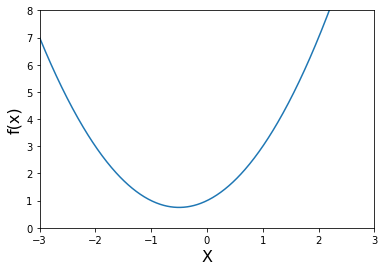

In [9]:
# Make Data
x_1 = np.linspace(start = -3, stop = 3, num = 500)

# Plotting the data
plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.plot(x_1, f(x_1))
plt.show()

In [5]:
def f(x):
    return(x**2 + x + 1)
    
def df(x):
    return(2*x + 1)

In [6]:
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(df(new_x))
    if step_size < precision:
        print('Hitup', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope or d(x) value at this poibt is', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Hitup 61
Local minimum occurs at:  -0.4999965672099885
Slope or d(x) value at this poibt is 6.8655800230521535e-06
f(x) value or cost at this point is:  0.750000000011784


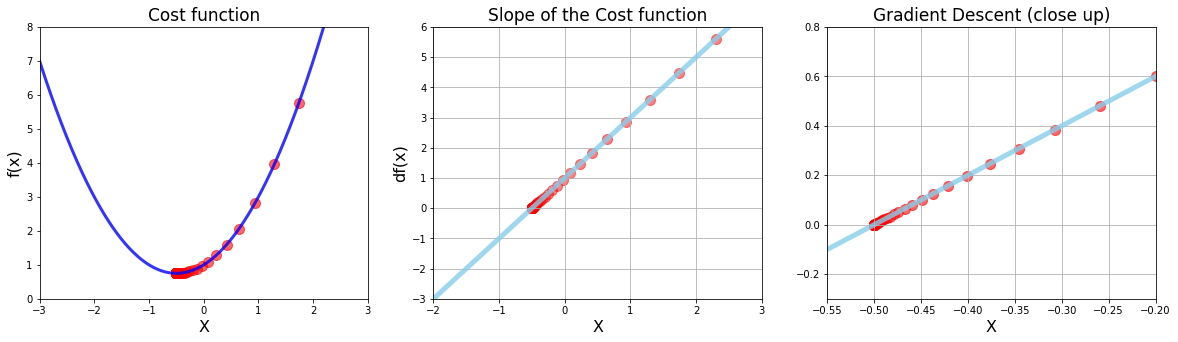

In [10]:
# Superimporse the graident descent calculations 
plt.figure(figsize=[20,5])
# First Chart
plt.subplot(1,3,1)
plt.xlim(-3,3)
plt.ylim(0,8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.plot(x_1,f(x_1) , c='blue', linewidth=3,alpha=0.8)
values = np.array(x_list)
plt.scatter(x_list, f(values), c='r',s=100, alpha=0.6)
# Second chart of the derivative

plt.subplot(1,3,2)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.title('Slope of the Cost function', fontsize=17)
plt.grid()
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.plot(x_1,df(x_1), c='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, c='r', s=100, alpha=0.5)
# Third chart of the derivative

plt.subplot(1,3,3)
plt.xlabel('X', fontsize=16)
plt.title('Gradient Descent (close up)', fontsize=17)
plt.grid()
plt.xlim(-0.55,-0.20)
plt.ylim(-0.3,0.8)
plt.plot(x_1,df(x_1), c='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, c='r', s=100, alpha=0.6)
plt.show()

### Gradient Descent as a python function

In [18]:
# Make some data
x_2 = np.linspace(-2,2,1000)

In [20]:
# Write a g(x) function 
def g(x):
    return(x**4 - 4*(x**2) + 5)
    
#Write the dg(x) function in python 
def dg(x):
    return(4*(x**3) - 8*x)

def gradient_descent(derivative_function, initial_guess, multiplier=0.02,precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_function(new_x)]
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_function(previous_x)
        new_x = previous_x - multiplier * gradient
        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_function(new_x))
        if step_size < precision:
            break
    return(new_x,x_list,slope_list)

In [16]:
local_min , list_x, deriv_list = gradient_descent(derivative_function = dg, initial_guess=0.5, multiplier=0.02, precision=0.001)
print("Local Min occurs at:", local_min)
print("Numbers of step:", len(list_x))

Local Min occurs at: 1.4122375085019094
Numbers of step: 23


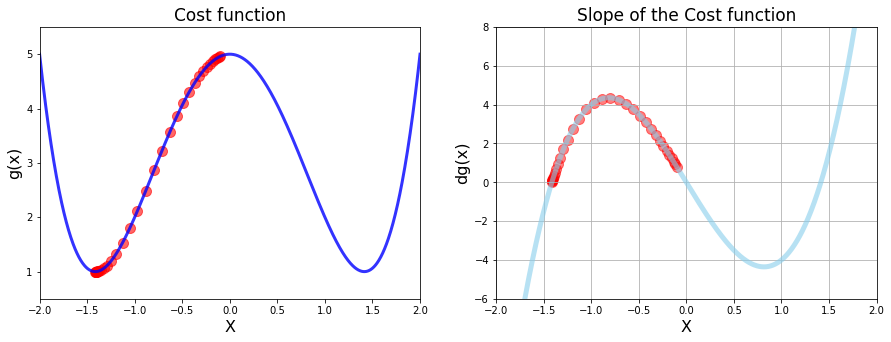

In [21]:
# Calling gradient descent function 
local_min , list_x, deriv_list = gradient_descent(derivative_function=dg, initial_guess=-.1)
# Plot function and derviative side by side and scatter plot side by side

plt.figure(figsize=[15,5])
# First Chart
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.plot(x_2,g(x_2) , c='blue', linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), c='r',s=100,alpha=0.6)
# Second chart of the derivative

plt.subplot(1,2,2)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope of the Cost function', fontsize=17)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2,dg(x_2), c='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x,deriv_list, c='r',s=100,alpha=0.5)
plt.show()

### The Learning Rate

In machine learning and statistics, the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function. Since it influences to what extent newly acquired information overrides old information, it metaphorically represents the speed at which a machine learning model "learns".

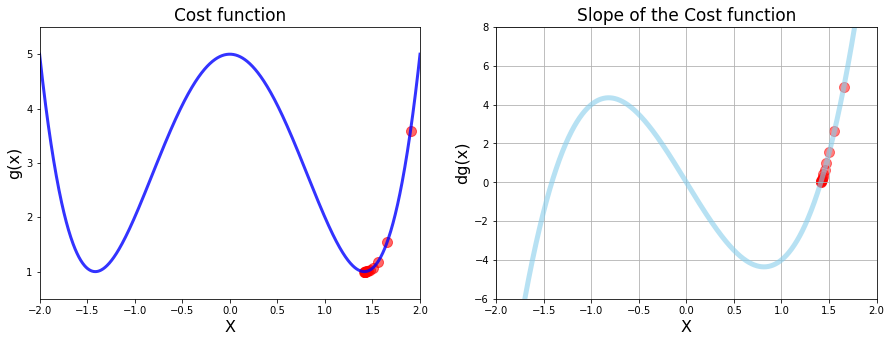

Number of the Steps:  14


In [22]:
# Calling gradient descent function 
local_min , list_x, deriv_list = gradient_descent(derivative_function=dg, 
                        initial_guess=1.9, multiplier=0.02 ,  max_iter=500)
# Plot function and derviative side by side and scatter plot side by side

plt.figure(figsize=[15,5])
# First Chart
plt.subplot(1,2,1)
plt.xlim([-2,2])
plt.ylim([0.5,5.5])
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)
plt.title('Cost function', fontsize=17)
plt.plot(x_2,g(x_2) , c='blue', linewidth=3,alpha=0.8)
plt.scatter(list_x,g(np.array(list_x)), c='r',s=100,alpha=0.6)
# Second chart of the derivative

plt.subplot(1,2,2)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.title('Slope of the Cost function', fontsize=17)
plt.grid()
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.plot(x_2,dg(x_2), c='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x,deriv_list, c='r',s=100,alpha=0.5)
plt.show()
print('Number of the Steps: ', len(list_x))

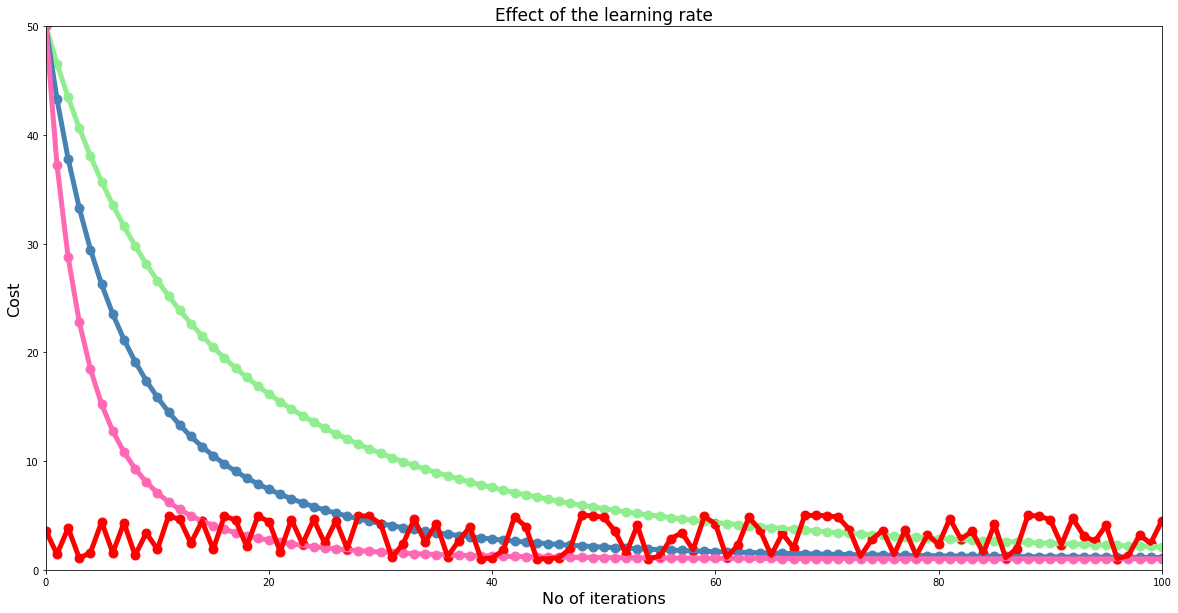

In [23]:
# running Gradient Descent 3 times
n = 100
# Low Gamma
low_gamma = gradient_descent(derivative_function=dg, 
                        initial_guess=3, multiplier=0.0005, precision=0.0001,   max_iter=n)

# mid gamma
mid_gamma = gradient_descent(derivative_function=dg, 
                        initial_guess=3, multiplier=0.001, precision=0.0001,   max_iter=n)
# High Gamma
high_gamma = gradient_descent(derivative_function=dg, 
                        initial_guess=3, multiplier=0.002, precision=0.0001,   max_iter=n)

# Insane Gamma
insane_gamma = gradient_descent(derivative_function=dg, 
                        initial_guess=1.9, multiplier=0.25, precision=0.0001,   max_iter=n)
# Plotting reduction in cost for each iteration
plt.figure(figsize=[20,10])
# First Chart
plt.xlim(0,n)
plt.ylim(0,50)
plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('No of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our Charts
# 1) Y axis Data: convert the list to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
# 2) X axis Data : create a list from 0 to n+1
iteration_list = list(range(0,n+1))
# Plotting Low learning rate
plt.plot(iteration_list,g(low_values) , c='lightgreen', linewidth=5)
plt.scatter(iteration_list,g(low_values), c='lightgreen',s=80)

# Plotting Mid learning rate
plt.plot(iteration_list,g(mid_values) , c='steelblue', linewidth=5)
plt.scatter(iteration_list,g(mid_values), c='steelblue',s=80)

# Plotting High learning rate
plt.plot(iteration_list,g(high_values) , c='hotpink', linewidth=5)
plt.scatter(iteration_list,g(high_values), c='hotpink',s=80)

# Plotting Insane learning rate
plt.plot(iteration_list,g(np.array(insane_gamma[1])) , c='red', linewidth=5)
plt.scatter(iteration_list,g(np.array(insane_gamma[1])), c='red',s=80)

plt.show()


### Example 4 - Data Visualization with 3D Charts

#### Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2}+1}$$

Minimise $$f(x,y) = \frac{1}{r+1}$$ where $r$ is $3^{-x^2-y^2}$

In [24]:
def f(x,y):
    r = 3 ** (-x**2 - y **2)
    return(1 / (r + 1))

# Make our x and y data
x_4  = np.linspace(start=-2,stop=2,num=200)
y_4  = np.linspace(start=-2,stop=2,num=200)
print('Shape of x Array ', x_4.shape)
x_4 , y_4 = np.meshgrid(x_4,y_4)
print('Array after meshgrid', x_4.shape)

Shape of x Array  (200,)
Array after meshgrid (200, 200)


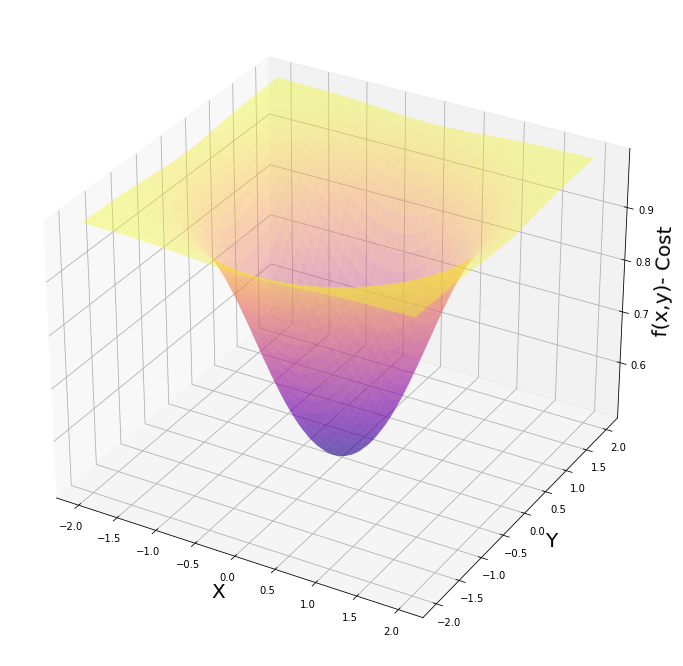

In [27]:
# generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x,y)- Cost', fontsize=20)
ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.plasma, alpha=0.4)
plt.show()